# **Credit Card Fraud Detection**

This project involves detecting fraudulent transactions in a credit card dataset using various data processing, visualization, and training our model with different Machine Learning Algorithms as Logistic Regression and Decision Tree Classifier.

##### **Before We Begin (About the Dataset)**

- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Unfortunately, due to confidentiality issues, the original features cannot be obtained.

##### **Our Goals**

- Gather Sense of the data from the numerical variables.
- Scale and Distribute the data so that it can be used by ML/DL Models.
- Understand the distribution of the data that was provided.

#### ***Importing all required libraries***

In [1]:
#Importing all the necessary packages
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from collections import Counter
import plotly.figure_factory as ff
from plotly.offline import iplot
import plotly.express as px

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

#### ***Loading the data into a dataframe***

In [2]:
df = pd.read_csv(r'D:\Projects\Data Science Project\New folder\Credit-Card-Fraud-Detection_dataset\creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### ***Getting a statistical description of the data***

In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### ***Checking for null values in the data***

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No null values are present in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### ***Checking how skewed the data really is***

In [9]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of time in the data')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of time in the data')

No Frauds 99.827 % of time in the data
Frauds 0.173 % of time in the data


- The dataset is extremely imbalanced.
- Almost all of the transaction are non-fraud.
- This will be a huge challenge in training a model, as it will definitely overfit, if the data is used as is.
- We need to convert the data into a more useful form that's not highly skewed.

#### ***Correlation Heatmap***

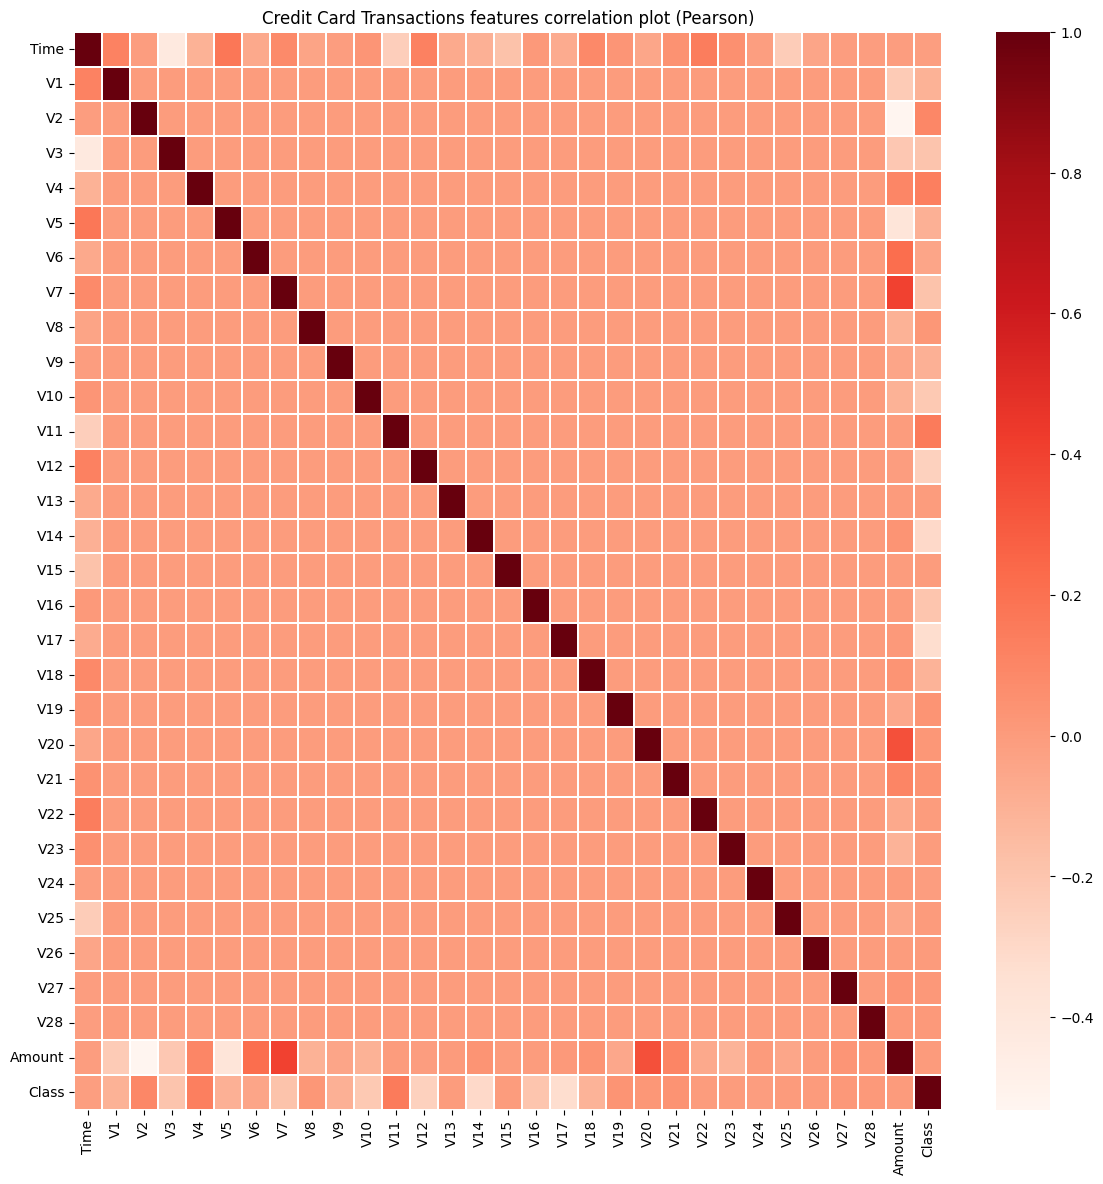

In [12]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()



- Diagonal Areas: Always show high correlation (close to 1) because they represent a feature's correlation with itself.
- Off-Diagonal Areas: Provide insights into relationships between different features. High correlations here may indicate redundancy, while low correlations suggest independence.

In [13]:
df.shape

(284807, 31)

#### ***Distribution of Transaction Time***

In [14]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [15]:
df.shape

(284807, 31)

#### ***Visualization of Class Distribution***

In [16]:
labels=["Genuine","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

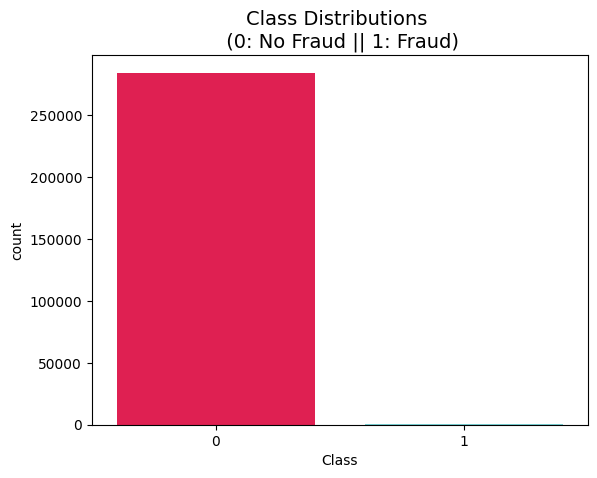

In [17]:
colors = ["#FF0043", "#69E2E5"]

sns.countplot(x='Class', palette=colors, data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

#### ***Plot Data Function***


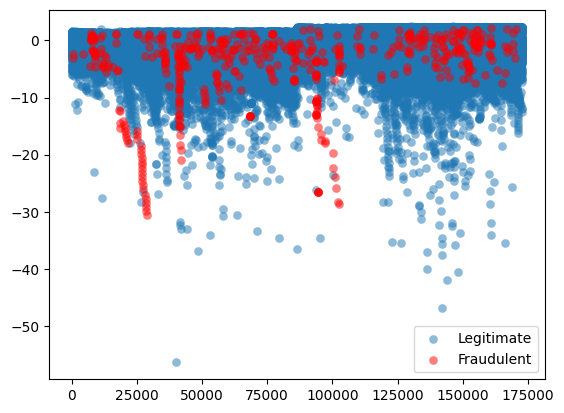

In [18]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Legitimate", alpha=0.5, linewidth=0.15,)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

def prep_data(df):
    # Split the data into features and labels
    X = df.drop(columns=['Class']).values
    y = df['Class'].values
    return X, y


X, y = prep_data(df)
plot_data(X, y)

- The distribution gives us an even better idea of skewed the dataset really is.
- Techniques have to be applied to make the distributions less skewed.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
X_test.shape


(85443, 30)

In [21]:
X_train.shape


(199364, 30)

#### ***Oversampling the Minority Class Using SMOTE (Synthetic Minority Over-sampling Technique)***
- **What SMOTE Is and Why It Is Used:** SMOTE (Synthetic Minority Over-sampling Technique) is a method for addressing class imbalance in datasets. It is used to improve the performance of machine learning models by generating synthetic samples for the underrepresented minority class, making the dataset more balanced.
- **How SMOTE Balances the Dataset:** SMOTE removes imbalance by creating new synthetic samples for the minority class through interpolation between existing samples and their nearest neighbors. This process effectively increases the number of examples for the minority class, helping to balance the class distribution.

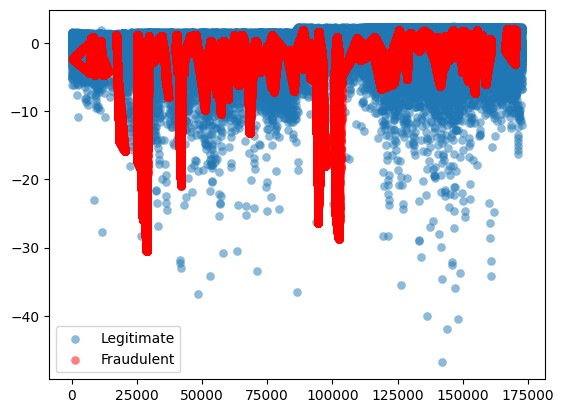

In [22]:
method=SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
plot_data(X_resampled, y_resampled)

#### ***Compare Original Data with Resampled Data***


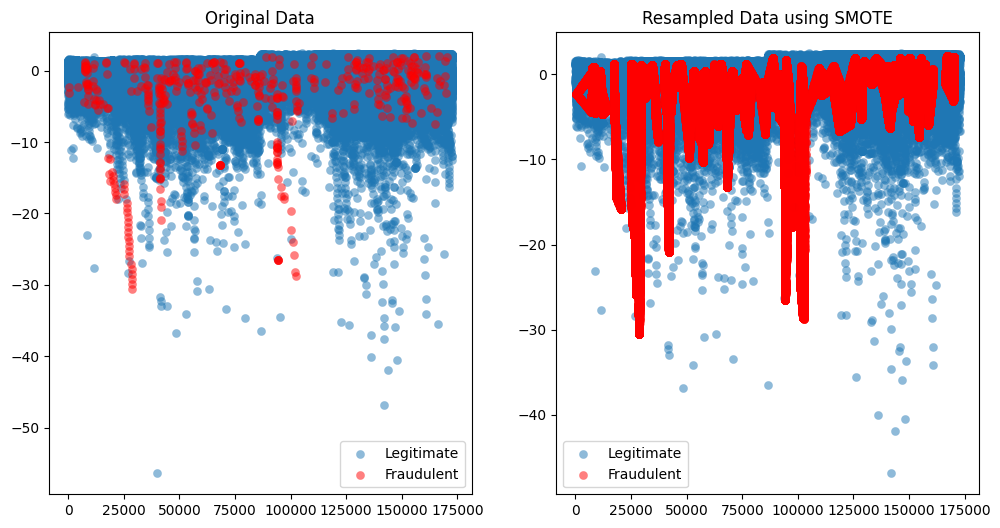

In [23]:

def compare_plot(X, y, X_resampled, y_resampled, method):
    #original Data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Legitimate", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Data')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Legitimate", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='r')
    plt.title(f'Resampled Data using {method}')
    plt.legend()

    plt.show()


# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE') 

- It can clearly be seen that the skewedness of the data has been mostly fixed.
- We will proceed with undersampling of the data to train our models

#### ***Class Distribution Before and After Resampling***


In [24]:
#Before Resampling
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
#After Resampling
# Print the value_counts on the resampled labels y_resampled
print(pd.value_counts(pd.Series(y_resampled)))

0    199019
1    199019
Name: count, dtype: int64


In [26]:
# Get the mean for each group to try and see if the resampling has changed the mean
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
#Class distribution for training
class_distribution = Counter(y_resampled)
print(f" Class distribution in Training: {class_distribution}")

 Class distribution in Training: Counter({0: 199019, 1: 199019})


In [28]:
y_train = y_resampled
X_train = X_resampled

In [29]:
#Claxss distribution for testing
class_distribution = Counter(y_train)
print(f" Class distribution in Training: {class_distribution}")

 Class distribution in Training: Counter({0: 199019, 1: 199019})


In [30]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [31]:
# # Turn the values into an array for feeding the classification algorithms.
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

# # Implementing simple classifiers

# classifiers = {
#     "LogisiticRegression": LogisticRegression(),
#     "GaussianNB" : GaussianNB(),
#     "RandomForestClassifier" : RandomForestClassifier()
#     "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy')
# }


# for key, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     training_score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

# **Implementation of Machine Learning Algorithms**

The following section outlines the implementation of various machine learning algorithms to detect fraudulent credit card transactions. These algorithms include Logistic Regression, Naive Bayes and Decision Tree Classifier,. The performance of each model will be evaluated using metrics such as accuracy, precision, recall, and confusion matrix.


## **Logistic Regression**

### ***About Logistic Regression***
- **Model the Relationship**: Logistic regression models the probability that a given input belongs to a particular class. It does this by applying a logistic function (sigmoid function) to a linear combination of input features, which outputs a probability value between 0 and 1.

- **Estimate Parameters**: The algorithm estimates the coefficients (weights) of the input features by minimizing the difference between the predicted probabilities and the actual class labels. This is typically done using a method called Maximum Likelihood Estimation (MLE).

- **Classify**: Based on the probability output, logistic regression assigns a class label to the input. A threshold (usually 0.5) is used to decide the final classification: if the predicted probability is above the threshold, the input is classified into one class; otherwise, it is classified into the other class.


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


### ***Evaluation Metrics***

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9836031038236017


In [34]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.09      0.88      0.16       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [35]:
LogisticRegression_acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(LogisticRegression_acc)) 
  
LogisticRegression_prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(LogisticRegression_prec)) 
  
LogisticRegression_rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(LogisticRegression_rec)) 
  
LogisticRegression_f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(LogisticRegression_f1)) 
  
LogisticRegression_MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(LogisticRegression_MCC)) 

The accuracy is 0.9836031038236017
The precision is 0.08531746031746032
The recall is 0.8775510204081632
The F1-Score is 0.15551537070524413
The Matthews correlation coefficient is0.2707440719028771


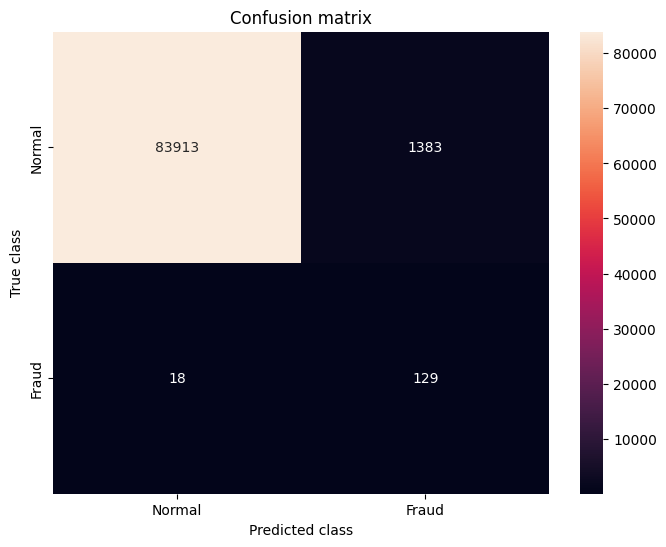

In [36]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(8, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 



## **Naive Bayes**

### ***About Naive Bayes***

- **Apply Bayes' Theorem**: Naive Bayes uses Bayes' Theorem to calculate the probability of a data point belonging to a particular class, given its feature values. The theorem combines prior probabilities with the likelihood of the features given the class.

- **Assume Independence**: The "naive" aspect comes from the assumption that all features are independent of each other given the class label. This simplifies the calculation of the likelihood of the features, making the model computationally efficient.

- **Classify**: For classification, Naive Bayes computes the posterior probability for each class and assigns the class with the highest posterior probability to the data point. This process involves calculating probabilities based on the feature values and class priors.

In [37]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model Training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[5]])

print("Actual Values: ", y_test[5])
print("Predicted Value:", predicted[0])

Actual Values:  0
Predicted Value: 0


### ***Evaluation Metrics***

In [38]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)


Accuracy: 0.9927905153143031


In [39]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.74      0.26       147

    accuracy                           0.99     85443
   macro avg       0.58      0.87      0.63     85443
weighted avg       1.00      0.99      1.00     85443



In [40]:
GaussianNaiveBayes_acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(GaussianNaiveBayes_acc)) 
  
GaussianNaiveBayes_prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(GaussianNaiveBayes_prec)) 
  
GaussianNaiveBayes_rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(GaussianNaiveBayes_rec)) 
  
GaussianNaiveBayes_f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(GaussianNaiveBayes_f1)) 
  
GaussianNaiveBayes_MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(GaussianNaiveBayes_MCC)) 

The accuracy is 0.9927905153143031
The precision is 0.1586608442503639
The recall is 0.7414965986394558
The F1-Score is 0.26139088729016785
The Matthews correlation coefficient is0.3409426900744093


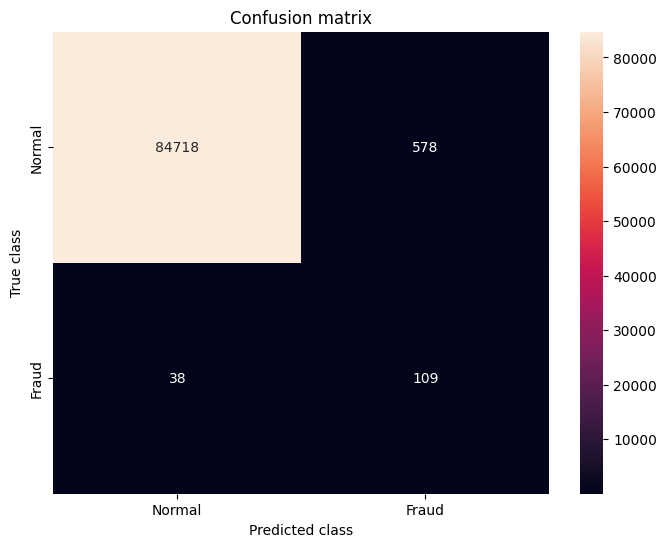

In [41]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(8, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

## **Decision Trees**

### ***About Decision Trees***

- **Split Data**: Decision Trees split the data into subsets based on feature values. At each node, the algorithm chooses the feature and corresponding threshold that best separates the classes according to a criterion (e.g., Gini impurity or entropy).

- **Recursive Partitioning**: This splitting process is applied recursively, creating branches and sub-branches (nodes) until the data is split into subsets where the classes are as pure as possible or until a stopping criterion is met (e.g., maximum tree depth or minimum samples per leaf).

- **Classify**: For classification, the tree makes predictions by traversing from the root to a leaf node based on feature values. The class label assigned to a leaf node is the most common class in that subset of the data, and this label is used as the prediction for new data points.

In [42]:
clf = DecisionTreeClassifier()


In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(X_test)

### ***About GridSearchCV***

- **Systematic Search**: GridSearchCV systematically searches through a predefined set of hyperparameters for a model by specifying a grid of parameter values. It evaluates every possible combination of these hyperparameters to determine which set yields the best performance.

- **Cross-Validation**: It uses cross-validation to assess model performance for each combination of hyperparameters. This involves splitting the training data into multiple folds, training the model on some folds, and validating it on others, ensuring that the performance evaluation is robust and generalizable.

- **Select Best Parameters**: After evaluating all combinations, GridSearchCV selects the hyperparameter set that achieves the highest performance based on a specified metric (e.g., accuracy, F1-score) and returns the best model with these optimal parameters.

In [45]:
param_dist={
    "criterion" : ["gini", "entropy"],
    "max_depth":[1,2,3,None]
}

In [46]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, None]})

In [48]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_index_)


DecisionTreeClassifier(criterion='entropy')
0.9988543799926022
{'criterion': 'entropy', 'max_depth': None}
7


### ***Visualizing the Decision Tree***

In [49]:
from sklearn import tree
print(tree.export_text(clf))

|--- feature_14 <= -1.81
|   |--- feature_12 <= -0.81
|   |   |--- feature_4 <= -0.57
|   |   |   |--- feature_10 <= -1.35
|   |   |   |   |--- feature_13 <= -0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  -0.19
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  -1.35
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  -0.57
|   |   |   |--- feature_1 <= 1.89
|   |   |   |   |--- feature_11 <= -0.69
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  -0.69
|   |   |   |   |   |--- feature_10 <= 2.31
|   |   |   |   |   |   |--- feature_7 <= 0.53
|   |   |   |   |   |   |   |--- feature_18 <= 3.21
|   |   |   |   |   |   |   |   |--- feature_10 <= 1.28
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -31.15
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -31.15
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 2.76
|   |   |   |   |   |   |   |   |   | 

[Text(0.34589270062665634, 0.9878048780487805, '[ 5.51970000e+04  8.51628202e-01 -1.53299212e+00  1.57147580e+00\n -8.43409246e-01 -2.02330945e+00  6.79343171e-01 -1.44245185e+00\n  5.58911167e-01  2.96485785e+00 -1.37707981e+00  7.32115246e-01\n  1.47699814e+00 -1.29252495e+00 -7.37990702e-01 -1.05094857e+00\n -1.18909783e+00  7.45928391e-01  1.66102144e-01  1.01617663e+00\n  3.96923706e-02  2.25664968e-01  9.64002468e-01 -2.24166563e-01\n  3.23844360e-01  3.54954526e-01  2.48419852e-01  8.48275922e-02\n  3.59335073e-02  1.25000000e+02] <= -1.813\ngini = 0.5\nsamples = 398038\nvalue = [199019, 199019]\nclass = 0'),
 Text(0.18040094274514135, 0.9634146341463414, '[ 1.53645000e+05  1.90302288e+00 -2.99770202e-01 -1.54412329e+00\n  1.43479978e-01 -8.50814559e-02 -1.53193828e+00  5.33069679e-01\n -4.63691379e-01  5.13508168e-01 -8.49940203e-02 -5.90904087e-01\n  2.30916534e-01 -2.54431733e-01  6.76984361e-01  7.20579127e-01\n -2.03205388e-01 -3.83090564e-01 -5.63935059e-01  8.53590473e-02

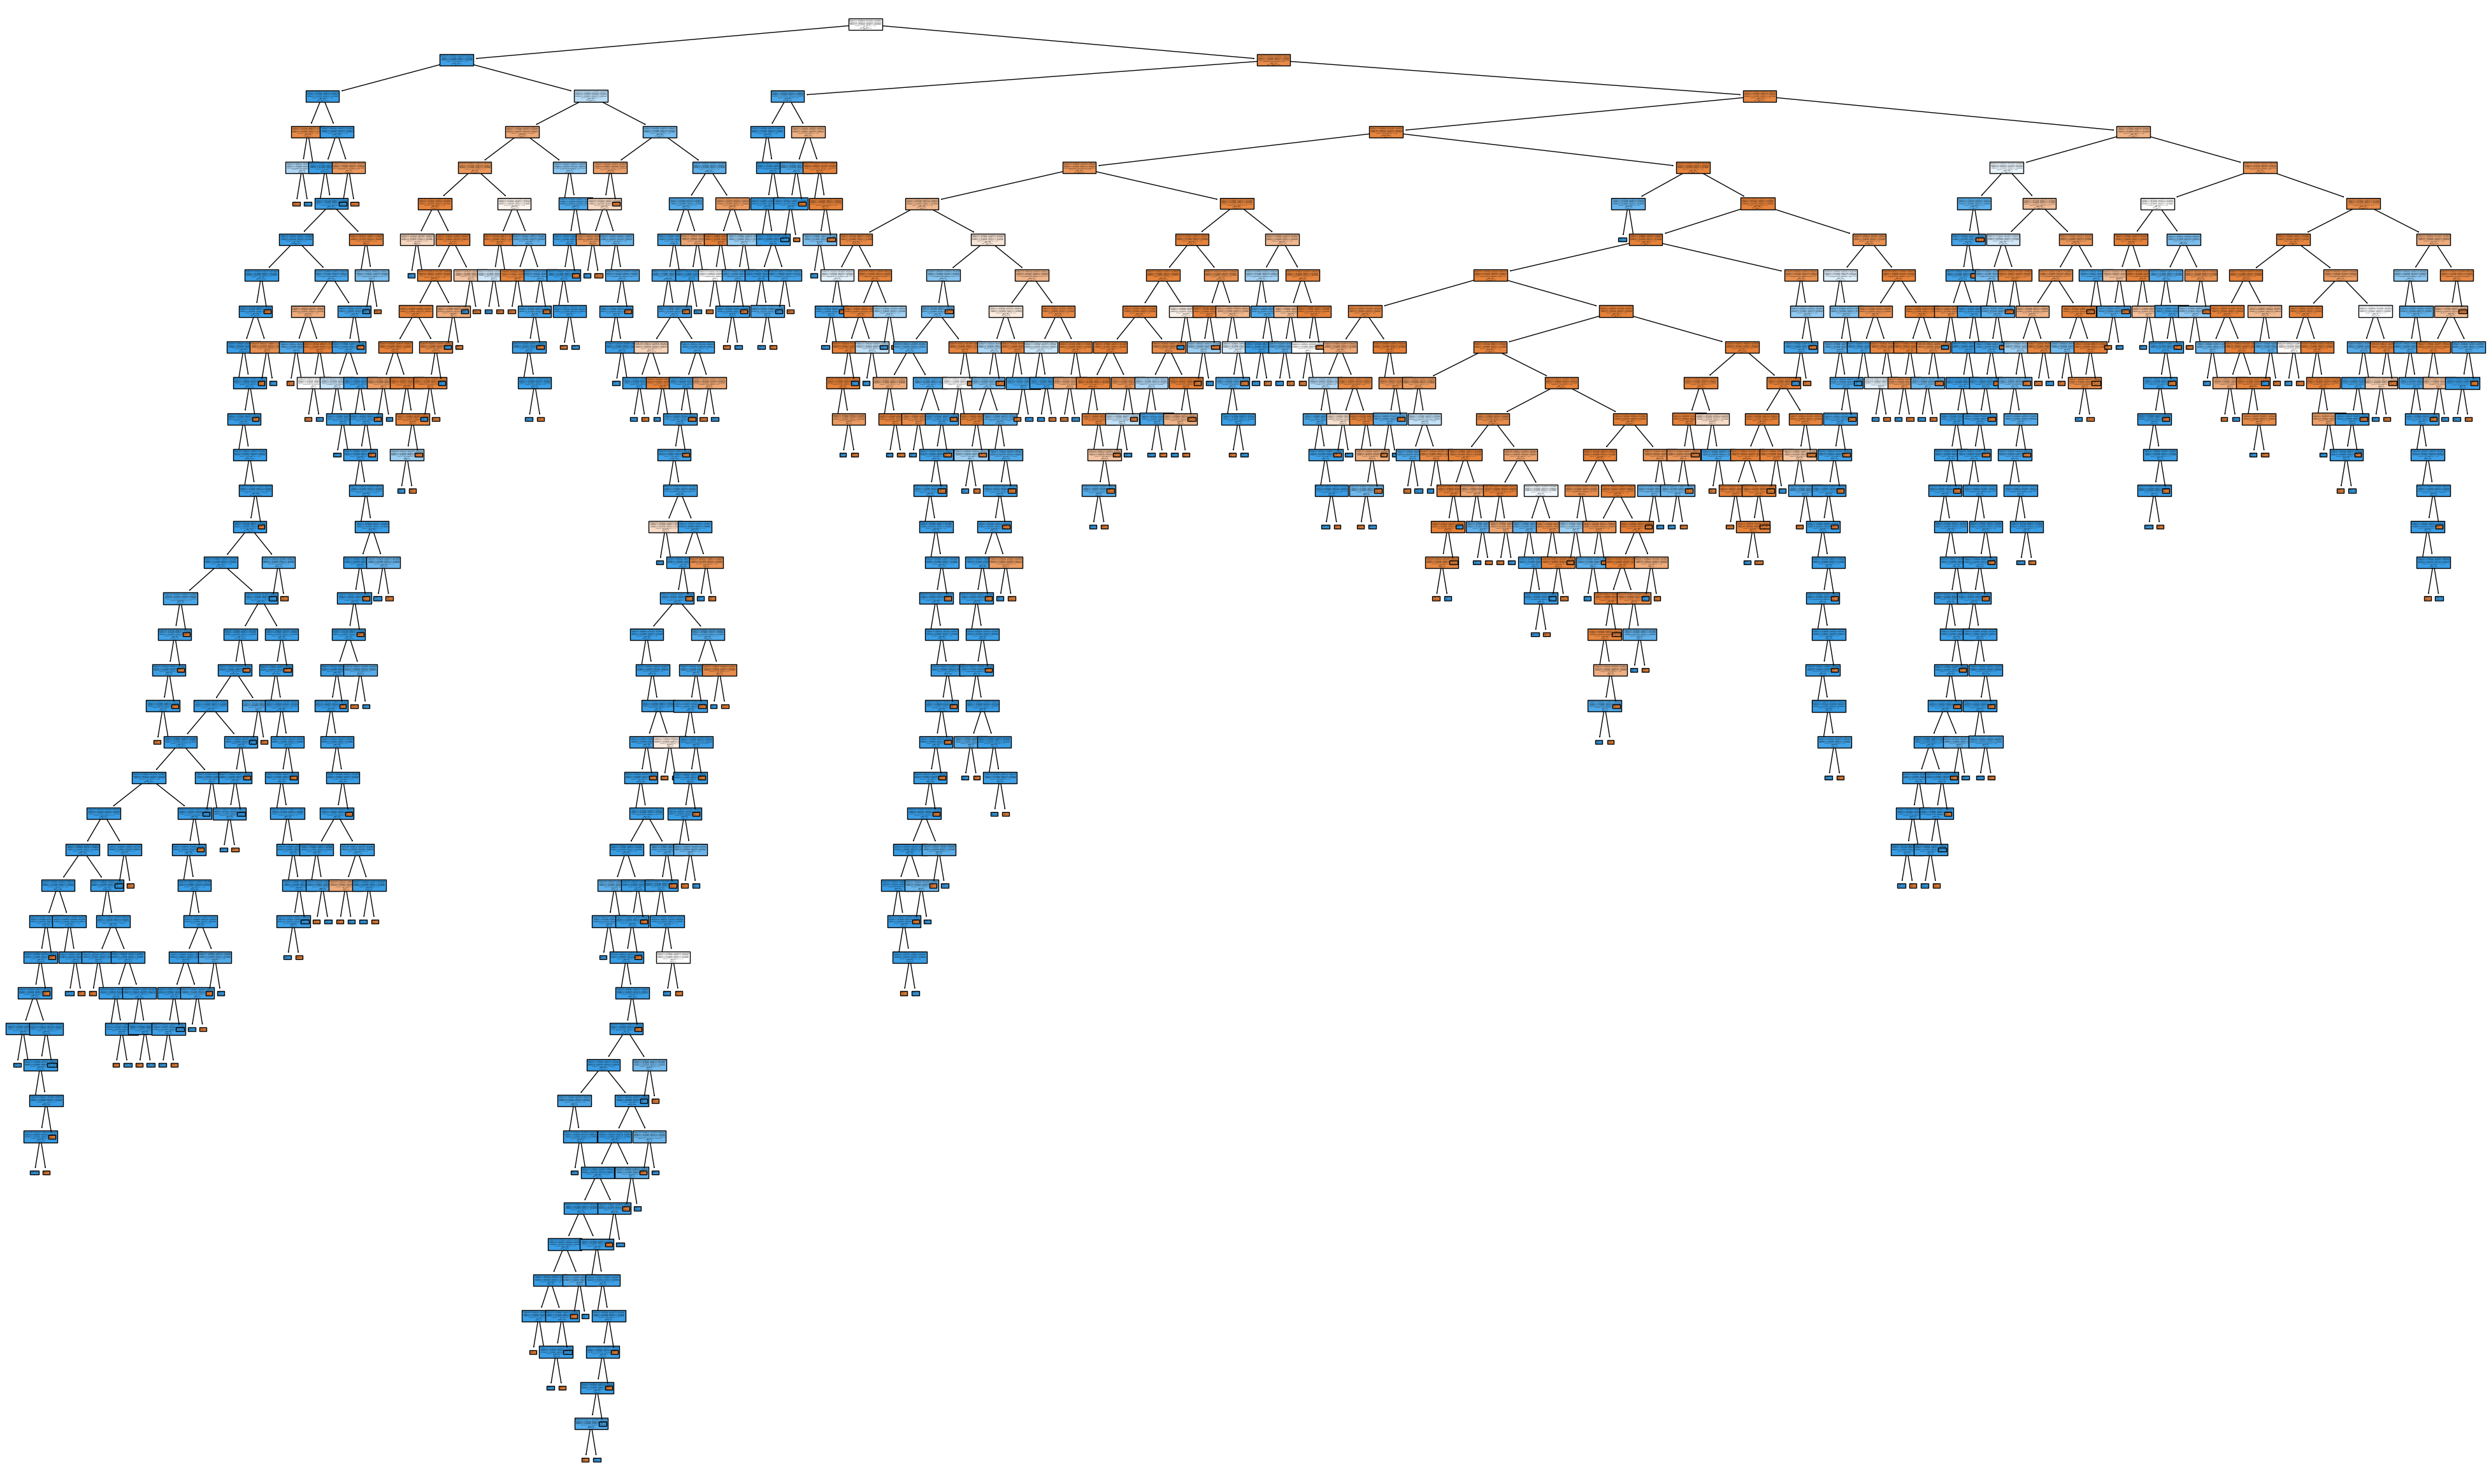

In [50]:
str_array = [str(i) for i in y_train]

fig = plt.figure(figsize=(50,30))
tree.plot_tree(clf,feature_names=X_train, class_names=str_array, filled = True)

### ***Evaluation Metrics***

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9979986657771848

In [52]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.45      0.75      0.56       147

    accuracy                           1.00     85443
   macro avg       0.73      0.87      0.78     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
DecisionTree_acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(DecisionTree_acc)) 
  
DecisionTree_prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(DecisionTree_prec)) 
  
DecisionTree_rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(DecisionTree_rec)) 
  
DecisionTree_f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(DecisionTree_f1)) 
  
DecisionTree_MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(DecisionTree_MCC)) 

The accuracy is 0.9979986657771848
The precision is 0.45081967213114754
The recall is 0.7482993197278912
The F1-Score is 0.5626598465473146
The Matthews correlation coefficient is0.5799271757072889


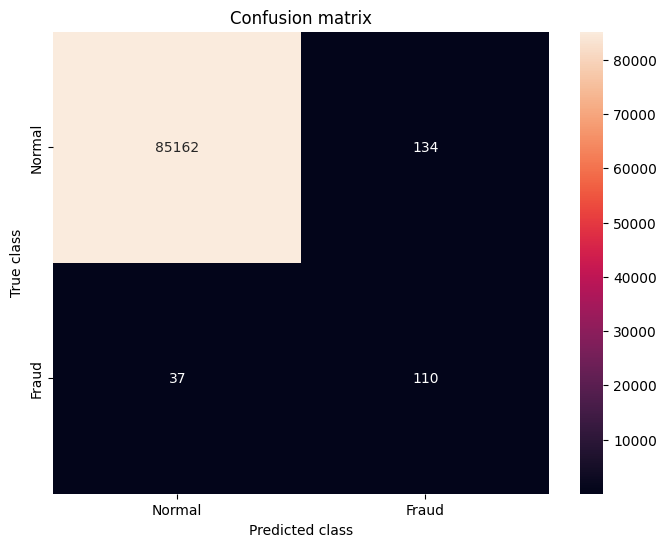

In [54]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(8, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

## **Summary of Model Performance Post-Training**

In [55]:
from tabulate import tabulate

# Format the values to 3 decimal places
data = [
    ["Logistic Regression", f"{LogisticRegression_acc:.3f}", f"{LogisticRegression_prec:.3f}", f"{LogisticRegression_rec:.3f}", f"{LogisticRegression_f1:.3f}", f"{LogisticRegression_MCC:.3f}"],
    ["Naive Bayes", f"{GaussianNaiveBayes_acc:.3f}", f"{GaussianNaiveBayes_prec:.3f}", f"{GaussianNaiveBayes_rec:.3f}", f"{GaussianNaiveBayes_f1:.3f}", f"{GaussianNaiveBayes_MCC:.3f}"],
    ["Decision Trees", f"{DecisionTree_acc:.3f}", f"{DecisionTree_prec:.3f}", f"{DecisionTree_rec:.3f}", f"{DecisionTree_f1:.3f}", f"{DecisionTree_MCC:.3f}"]
]

# Define the column headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Matthews Correlation"]

# Create the table
table = tabulate(data, headers=headers, tablefmt="pretty")

# Display the table
print(table)


+---------------------+----------+-----------+--------+----------+----------------------+
|        Model        | Accuracy | Precision | Recall | F1-Score | Matthews Correlation |
+---------------------+----------+-----------+--------+----------+----------------------+
| Logistic Regression |  0.984   |   0.085   | 0.878  |  0.156   |        0.271         |
|     Naive Bayes     |  0.993   |   0.159   | 0.741  |  0.261   |        0.341         |
|   Decision Trees    |  0.998   |   0.451   | 0.748  |  0.563   |        0.580         |
+---------------------+----------+-----------+--------+----------+----------------------+


## ***Things to Remember***

- **Type 1 Error:** Occurs when the model predicts a positive outcome, but in reality, it’s negative. Essentially, it’s a false alarm.
- **Type 2 Error:** Represents the opposite scenario. The model predicts a negative outcome, but the reality is positive. This is akin to a missed opportunity.

### **Regarding the Confusion Matrix**

***Note: Sensitivity == Recall***

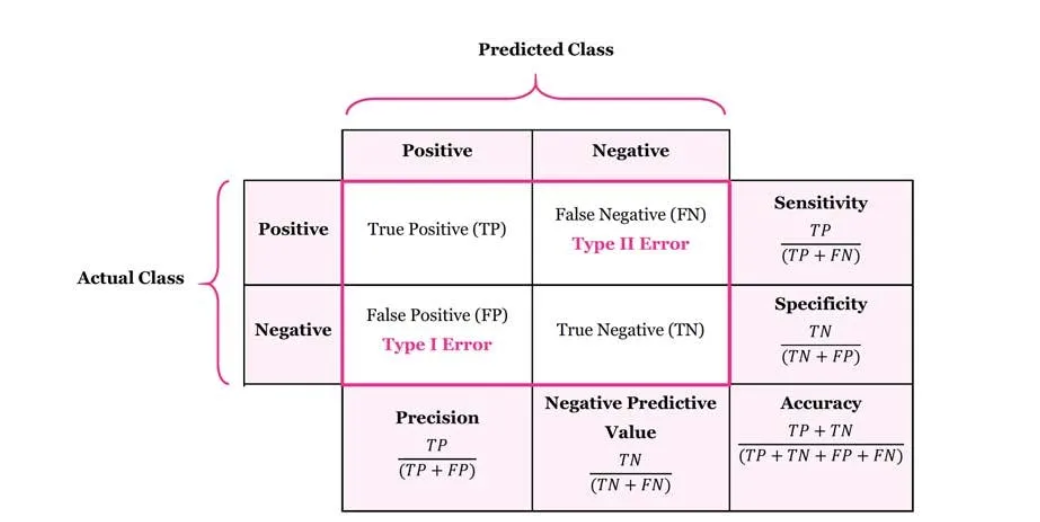

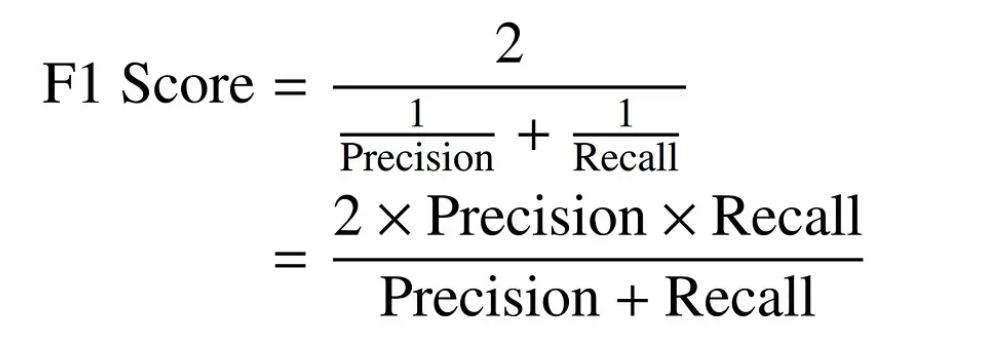

## **This concludes the project on credit card fraud detection utilizing supervised learning algorithms.**